In [ ]:
#/content/drive/My Drive/Colab/Aribnb/data_prepare/downloadOI.py
%cd /content/drive/My Drive/Colab/Aribnb/data_prepare
%cp -av *    /content/

#%cd /content/drive/My Drive/Colab/Aribnb/predict
#%cp -av *    /content/
%cd /content/


!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version
# opencv is pre-installed on colab


!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html


/content/drive/My Drive/Colab/Aribnb/data_prepare
'class-descriptions-boxable.csv' -> '/content/class-descriptions-boxable.csv'
'downloadOI.py' -> '/content/downloadOI.py'
'downloadOI_v4.py' -> '/content/downloadOI_v4.py'
'p0_data_processing.ipynb' -> '/content/p0_data_processing.ipynb'
'test-annotations-bbox.csv' -> '/content/test-annotations-bbox.csv'
'train-annotations-bbox.csv' -> '/content/train-annotations-bbox.csv'
'validation-annotations-bbox.csv' -> '/content/validation-annotations-bbox.csv'
/content
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 25kB/s 
     |████████████████████████████████| 4.1MB 24.9MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████

In [ ]:
%mkdir validation
%cd /content/drive/MyDrive/Colab/Aribnb/predict/validation
%cp -av *    /content/validation
%cd /content/

In [ ]:
%cd /content/drive/My Drive/Colab/Aribnb/predict_ap44
%cp -av *    /content/
%cd /content/

/content/drive/My Drive/Colab/Aribnb/predict_ap44
'config.yaml' -> '/content/config.yaml'
'model_final.pth' -> '/content/model_final.pth'
'p5-gcp-all_ap44.ipynb' -> '/content/p5-gcp-all_ap44.ipynb'
/content


In [ ]:
!pip install awscli

     |████████████████████████████████| 3.5MB 11.7MB/s 
     |████████████████████████████████| 7.0MB 62.9MB/s 
     |████████████████████████████████| 71kB 11.5MB/s 
     |████████████████████████████████| 552kB 58.7MB/s 
     |████████████████████████████████| 143kB 64.1MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Found existing installation: rsa 4.6
    Uninstalling rsa-4.6:
      Successfully uninstalled rsa-4.6
  Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


In [ ]:
!python3 downloadOI.py --classes 'Toilet,Swimming pool,Bed,Billiard table,Sink,Fountain,Oven,Ceiling fan,Television,Microwave oven,Gas stove,Refrigerator,Kitchen & dining room table,Washing machine,Bathtub,Stairs,Fireplace,Pillow,Mirror,Shower,Couch,Countertop,Coffeemaker,Dishwasher,Sofa bed,Tree house,Towel,Porch,Wine rack,Jacuzzi' --dataset validation

In [ ]:
# What GPU are we using?
!nvidia-smi

Wed Dec  2 01:15:38 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd /content/drive/MyDrive/Colab/Aribnb/predict
%cp -av *    /content/
%cd /content/

/content/drive/MyDrive/Colab/Aribnb/predict
'config.yaml' -> '/content/config.yaml'
'model_final.pth' -> '/content/model_final.pth'
'validation_labels.json' -> '/content/validation_labels.json'
/content


In [ ]:
import logging
import os
import argparse
from collections import OrderedDict
import pandas as pd
import numpy as np
import torch
from torch.nn.parallel import DistributedDataParallel
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer



** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [ ]:
# import some common libraries
import cv2
import json
import random
import os
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow
from tqdm import tqdm


import torch, torchvision
print(torch.__version__)
!gcc --version

1.4.0+cu100
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
subset = ["Toilet",
          "Swimming_pool",
          "Bed",
          "Billiard_table",
          "Sink",
          "Fountain",
          "Oven",
          "Ceiling_fan",
          "Television",
          "Microwave_oven",
          "Gas_stove",
          "Refrigerator",
          "Kitchen_&_dining_room_table",
          "Washing_machine",
          "Bathtub",
          "Stairs",
          "Fireplace",
          "Pillow",
          "Mirror",
          "Shower",
          "Couch",
          "Countertop",
          "Coffeemaker",
          "Dishwasher",
          "Sofa_bed",
          "Tree_house",
          "Towel",
          "Porch",
          "Wine_rack",
          "Jacuzzi"]


subset = [x.replace("_"," ") for x in subset]

In [ ]:
import pandas as pd

valid_df = pd.read_csv("validation-annotations-bbox.csv")

In [ ]:
%%time
valid_img_dicts = get_image_dicts(valid_path,"validation-annotations-bbox.csv",target_classes=subset)

Using validation-annotations-bbox.csv for annotations...


5it [00:00, 45.98it/s]

On dataset: validation
Classes we're using:
 Swimming pool                  161
Bed                            125
Kitchen & dining room table     76
Pillow                          76
Countertop                      68
Couch                           61
Sofa bed                        61
Sink                            57
Porch                           52
Stairs                          45
Television                      44
Fireplace                       41
Washing machine                 40
Toilet                          37
Oven                            36
Mirror                          33
Billiard table                  32
Microwave oven                  30
Refrigerator                    26
Fountain                        24
Gas stove                       23
Coffeemaker                     21
Bathtub                         18
Wine rack                       17
Jacuzzi                         16
Ceiling fan                     11
Tree house                      11
Shower    

859it [00:13, 65.79it/s]

Saving labels to: ./validation/validation_labels.json...
CPU times: user 13.5 s, sys: 225 ms, total: 13.7 s
Wall time: 13.7 s


In [ ]:
three_class_metadata = register_datasets(valid_path=valid_path,target_classes=target_classes)

Registering: validation


In [ ]:
import detectron2
# Load in config file
loaded_cfg = get_cfg()
loaded_cfg = loaded_cfg.load_yaml_with_base("/content/drive/MyDrive/Colab/Aribnb/predict_ap44/config.yaml")
loaded_cfg = detectron2.config.CfgNode(loaded_cfg)

from detectron2.engine import DefaultPredictor

loaded_cfg["MODEL"]["WEIGHTS"] = os.path.join("/content/drive/MyDrive/Colab/Aribnb/predict_ap44/model_final.pth")

loaded_cfg["MODEL"]["RETINANET"]["SCORE_THRESH_TEST"] = 0.3
loaded_cfg["DATASETS"]["TEST"] = ("valid" )
predictor = DefaultPredictor(loaded_cfg)



{'instances': Instances(num_instances=2, image_height=768, image_width=1024, fields=[pred_boxes: Boxes(tensor([[   8.5965,   38.1436, 1024.0000,  763.6945],
        [   3.9574,   32.4620, 1019.2993,  762.0772]], device='cuda:0')), scores: tensor([0.4879, 0.3428], device='cuda:0'), pred_classes: tensor([ 1, 16], device='cuda:0')])}


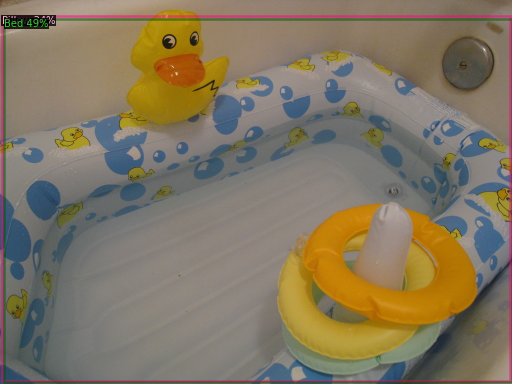

{'instances': Instances(num_instances=2, image_height=768, image_width=1024, fields=[pred_boxes: Boxes(tensor([[170.8806, 259.5416, 933.2396, 495.3466],
        [ 51.4433, 232.2939, 994.8568, 635.6822]], device='cuda:0')), scores: tensor([0.6105, 0.4359], device='cuda:0'), pred_classes: tensor([9, 9], device='cuda:0')])}


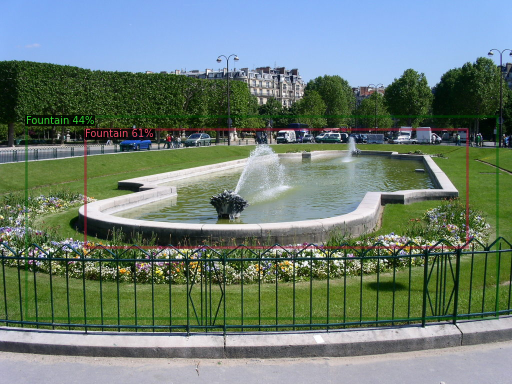

{'instances': Instances(num_instances=1, image_height=576, image_width=1024, fields=[pred_boxes: Boxes(tensor([[ 35.4747, 107.4219, 967.2831, 530.3974]], device='cuda:0')), scores: tensor([0.4201], device='cuda:0'), pred_classes: tensor([5], device='cuda:0')])}


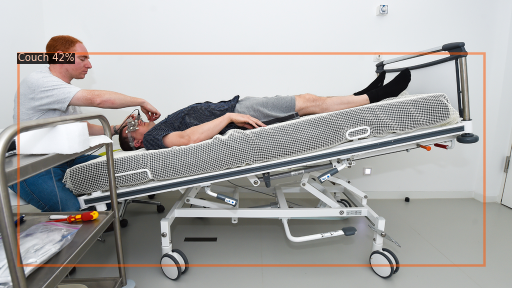

In [ ]:
from detectron2.utils.visualizer import ColorMode
#dataset_dicts = get_balloon_dicts("balloon/val")
for d in random.sample(valid_img_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    print(outputs)
    v = Visualizer(im[:, :, ::-1],
                   metadata=three_class_metadata, 
                   scale=0.5 
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
### predict own images 

{'instances': Instances(num_instances=2, image_height=1080, image_width=1440, fields=[pred_boxes: Boxes(tensor([[  43.8728,  666.1874, 1435.1946, 1080.0000],
        [ 121.8993,  687.8655,  719.8270,  977.2254]], device='cuda:0')), scores: tensor([0.9473, 0.7593], device='cuda:0'), pred_classes: tensor([ 6, 20], device='cuda:0')])}


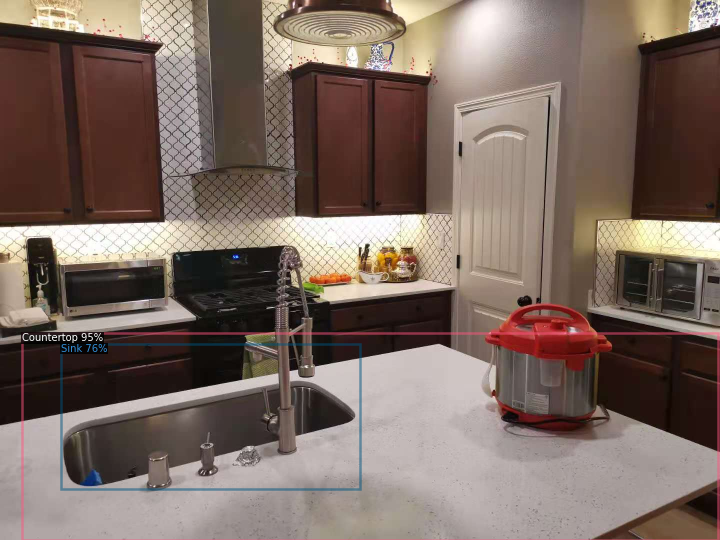

In [ ]:
im = cv2.imread("/content/test-t2.jpg")
outputs = predictor(im)
print(outputs)
v = Visualizer(im[:, :, ::-1],
                   metadata=three_class_metadata, 
                   scale=0.5 

    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])